In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of principal components selected: 2

In [ ]:
# Initialize and fit PCA with 2 components
pca = PCA(n_components=2)
scores_pca = pca.fit_transform(X)

In [ ]:
# Try different threshold values for BIRCH
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5]
n_clusters_range = range(2, 11)

results = []

for n_clusters in n_clusters_range:
    for threshold in threshold_values:
        # Initialize and fit BIRCH
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        birch.fit(scores_pca)
        cluster_labels = birch.labels_

        # Calculate metrics
        silhouette = silhouette_score(scores_pca, cluster_labels)
        calinski = calinski_harabasz_score(scores_pca, cluster_labels)
        davies = davies_bouldin_score(scores_pca, cluster_labels)

        results.append({
            'n_clusters': n_clusters,
            'threshold': threshold,
            'silhouette': silhouette,
            'calinski': calinski,
            'davies': davies
        })

        print(f"Clusters: {n_clusters}, Threshold: {threshold:.1f}",
              f"Silhouette: {silhouette:.4f}",
              f"Calinski-Harabasz: {calinski:.4f}",
              f"Davies-Bouldin: {davies:.4f}")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the best parameters based on silhouette score
best_result = results_df.loc[results_df['silhouette'].idxmax()]
print("\nBest parameters:")
print(f"Number of clusters: {best_result['n_clusters']}")
print(f"Threshold: {best_result['threshold']}")
print(f"Silhouette Score: {best_result['silhouette']:.4f}")

Clusters: 2, Threshold: 0.1 Silhouette: 0.5043 Calinski-Harabasz: 103556.8781 Davies-Bouldin: 0.6859
Clusters: 2, Threshold: 0.2 Silhouette: 0.4812 Calinski-Harabasz: 94836.9777 Davies-Bouldin: 0.6947
Clusters: 2, Threshold: 0.3 Silhouette: 0.5023 Calinski-Harabasz: 106817.1997 Davies-Bouldin: 0.6823
Clusters: 2, Threshold: 0.4 Silhouette: 0.4991 Calinski-Harabasz: 103361.6633 Davies-Bouldin: 0.6906
Clusters: 2, Threshold: 0.5 Silhouette: 0.5519 Calinski-Harabasz: 131089.8636 Davies-Bouldin: 0.6489
Clusters: 3, Threshold: 0.1 Silhouette: 0.4174 Calinski-Harabasz: 89764.5533 Davies-Bouldin: 0.8473
Clusters: 3, Threshold: 0.2 Silhouette: 0.3441 Calinski-Harabasz: 83693.5770 Davies-Bouldin: 1.0695
Clusters: 3, Threshold: 0.3 Silhouette: 0.3507 Calinski-Harabasz: 88666.9699 Davies-Bouldin: 0.9860
Clusters: 3, Threshold: 0.4 Silhouette: 0.3158 Calinski-Harabasz: 76260.3612 Davies-Bouldin: 1.2134
Clusters: 3, Threshold: 0.5 Silhouette: 0.4631 Calinski-Harabasz: 103266.0894 Davies-Bouldin: 0.

In [ ]:
# Use the best parameters to create final clustering
best_birch = Birch(n_clusters=int(best_result['n_clusters']),
                   threshold=best_result['threshold'])
best_birch.fit(scores_pca)

# Create visualization of the clusters
# Create results DataFrame
df_segm_pca_birch = pd.concat([
    X.reset_index(drop=True),
    pd.DataFrame(scores_pca, columns=['Component 1', 'Component 2'])
], axis=1)

df_segm_pca_birch['Cluster'] = best_birch.labels_

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_segm_pca_birch['Component 2'],
                     df_segm_pca_birch['Component 1'],
                     c=df_segm_pca_birch['Cluster'],
                     cmap='viridis')
plt.colorbar(scatter)
plt.title('BIRCH Clustering Results with PCA Components')
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.show()

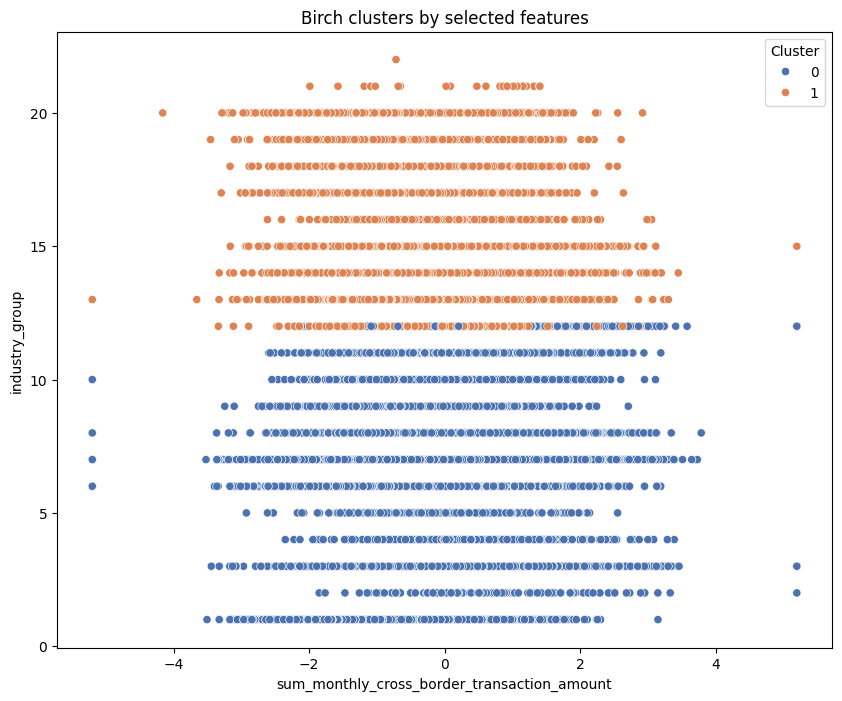

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_segm_pca_birch,
    x='sum_monthly_cross_border_transaction_amount',
    y='industry_group',
    hue='Cluster',
    palette="deep"
)
plt.title('Birch clusters by selected features')
plt.show()